In [1]:
import numpy as np
import seaborn as sns
import math

In [66]:
x = 2000
y = 3200

finesse = 150
width = math.ceil(150/finesse)

m = math.floor(y/finesse)
n = math.floor(x/finesse)

top = (m*finesse)/2

maze = np.ones(shape = (m,n))

cmap = "GnBu"

In [67]:
def print_path(maze,path):
    final_maze = maze.copy()
    
    for p in path:
        final_maze[p[0]][p[1]] = 0.5
    
    sns.heatmap(final_maze, linewidths = 0.01, cmap = cmap)
    
    print(final_maze)

In [68]:
def get_neighbors():
    neighbors = []
    
    for x in range(-width,width+1):
        for y in range(-width,width+1):
            neighbors.append((x,y))
    
    neighbors.remove((0,0))
    return neighbors

In [69]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

In [70]:
def astar(maze, start, end):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    
    open_list = []
    closed_list = []
    
    open_list.append(start_node)
    
    while len(open_list) > 0:
        
        current_node = open_list[0]
        current_index = 0
        
        #Find the best node
        for index,item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                
        #Pop current node and add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        
        #Finished
        if current_node == end_node:
            path = []
            current = current_node
            
            while current is not None:
                path.append(current.position)
                current = current.parent
                
            return path[::-1] #Return reversed path
        
        #Generate children
        children = []
        
        for new_position in [(0,-1),(0,1),(1,0),(-1,0),(-1,1),(-1,-1),(1,-1),(1,1)]:
            
            #Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[0]) - 1) or node_position[1] < 0:
                continue
                
            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] == 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)
            

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = heuristic(child,end_node)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)
                

In [71]:
def heuristic(current, end):
    #h = ((current.position[0] - end.position[0]) ** 2) + ((current.position[1] - end.position[1]) ** 2)
    h = np.abs(current.position[0] - end.position[0]) + np.abs(current.position[1] - end.position[1])
    return h

In [72]:
def map_position(position):
    j = math.floor(position[0]/finesse)
    i = math.floor((-position[1]+top)/finesse)
    
    return i,j

In [73]:
def map_inverse(matrix_pos):
    
    half = finesse/2
    
    x = (matrix_pos[1]*finesse) + half
    y = top - (matrix_pos[0]*finesse) - half
    
    return x,y

In [74]:
def is_blocked(obstacle, matrix_pos):
    x,y = map_inverse(matrix_pos)
    
    distance = np.sqrt(np.power(x - obstacle[0],2) + np.power(y - obstacle[1],2))
    
    return 1 if distance > 150 else 0 

In [75]:
def check_neighbors(obstacle):
    global maze
    center_pos = map_position(obstacle)
    
    maze[center_pos[0]][center_pos[1]] = 0
    print(center_pos)
    
    for new_position in get_neighbors():
        #Get node position
        pos = (center_pos[0] + new_position[0], center_pos[1] + new_position[1])

        if pos[0] > (len(maze) - 1) or pos[0] < 0 or pos[1] > (len(maze[0]) - 1) or pos[1] < 0:
            print('continue')
            continue
            
        res = is_blocked(obstacle, pos) 
        
        print('Position {} is {}'.format(pos,res))
            
        maze[pos[0]][pos[1]] = res    
        

In [76]:
check_neighbors((1000,0))

(10, 6)
Position (9, 5) is 1
Position (9, 6) is 1
Position (9, 7) is 1
Position (10, 5) is 1
Position (10, 7) is 0
Position (11, 5) is 1
Position (11, 6) is 1
Position (11, 7) is 1


In [77]:
map_position((1000,0))

(10, 6)

In [78]:
check_neighbors((200,1400))

(1, 1)
Position (0, 0) is 1
Position (0, 1) is 0
Position (0, 2) is 1
Position (1, 0) is 0
Position (1, 2) is 1
Position (2, 0) is 1
Position (2, 1) is 1
Position (2, 2) is 1


In [79]:
maze[6][4] = maze[6][5] = maze[7][5] = 0

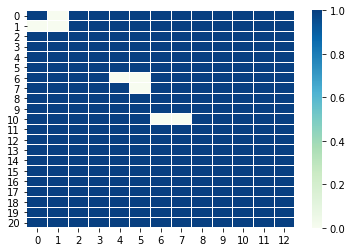

In [80]:
sns.heatmap(maze, linewidths = 0.01, vmin =0, vmax = 1, cmap=cmap)

In [59]:
map_inverse((2,2))

(250.0, 1350.0)

In [36]:
start = (11,7)
end = (7,4)

In [37]:
path = astar(maze, start, end)

In [38]:
path

[(11, 7), (10, 6), (9, 5), (8, 4), (7, 4)]

[[0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  0.5 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  

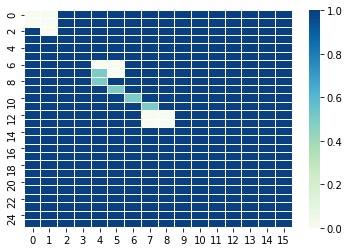

In [39]:
print_path(maze,path)

In [47]:
map_position((200,1400))

(2, 2)

In [62]:
map_inverse((0,1))

(150.0, 1550.0)

In [61]:
distance((200,1400),(0,1))

158.11388300841898

In [60]:
def distance(obstacle, matrix_pos):
    x,y = map_inverse(matrix_pos)
    
    distance = np.sqrt(np.power(x - obstacle[0],2) + np.power(y - obstacle[1],2))
    
    return distance